Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [9]:
# Write your code for AIM #1 here
import pandas as pd
import numpy as np
import time

# 1. Generate a dataset of 1 million random data items between 1 and 100 using pandas
start_time_pandas = time.time()
df_pandas = pd.DataFrame(np.random.randint(1, 101, size=(1000000, 1)), columns=['Random Numbers'])
end_time_pandas = time.time()
time_pandas = end_time_pandas - start_time_pandas

# 2. Generate a dataset of 1 million random data items between 1 and 100 using NumPy
start_time_numpy = time.time()
data_numpy = np.random.randint(1, 101, size=1000000)
end_time_numpy = time.time()
time_numpy = end_time_numpy - start_time_numpy

(time_pandas, time_numpy)

#NumPy is faster. Pandas introduces certain overhead for data analysis, while NumPy efficiently and concisely processes numerical data

(0.008305788040161133, 0.006012439727783203)

AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [1]:
import numpy as np
import pandas as pd
import time

 
start_time_pandas = time.time()


df = pd.read_csv('sleep_health.csv')


mean_sleep_duration_pd = df['Sleep Duration'].mean()
mean_systolic_bp_pd = df['Systolic blood pressure'].mean()
mean_diastolic_bp_pd = df['Diastolic blood pressure'].mean()
mean_heart_rate_pd = df['Heart Rate'].mean()
mean_daily_steps_pd = df['Daily Steps'].mean()


numeric_df = df.select_dtypes(include=[np.number])
correlation_pd = numeric_df.corr()


correlation_sleep_age = df['Sleep Duration'].corr(df['Age'])
correlation_sleep_heart_rate = df['Sleep Duration'].corr(df['Heart Rate'])
correlation_sleep_daily_steps = df['Sleep Duration'].corr(df['Daily Steps'])


std_sleep_duration_pd = df['Sleep Duration'].std()

end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas


start_time_numpy = time.time()


data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)


mean_sleep_duration_np = data['Sleep_Duration'].astype(float).mean()
mean_systolic_bp_np = data['Systolic_blood_pressure'].astype(float).mean()
mean_diastolic_bp_np = data['Diastolic_blood_pressure'].astype(float).mean()
mean_heart_rate_np = data['Heart_Rate'].astype(float).mean()
mean_daily_steps_np = data['Daily_Steps'].astype(float).mean()


def calculate_correlation(data, var1, var2):
    return np.corrcoef(data[var1].astype(float), data[var2].astype(float))[0, 1]

correlation_sleep_age_np = calculate_correlation(data, 'Sleep_Duration', 'Age')
correlation_sleep_heart_rate_np = calculate_correlation(data, 'Sleep_Duration', 'Heart_Rate')
correlation_sleep_daily_steps_np = calculate_correlation(data, 'Sleep_Duration', 'Daily_Steps')


std_sleep_duration_np = np.std(data['Sleep_Duration'].astype(float))

end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy


print("Pandas Mean Values:")
print(f"Sleep Duration: {mean_sleep_duration_pd}")
print(f"Systolic Blood Pressure: {mean_systolic_bp_pd}")
print(f"Diastolic Blood Pressure: {mean_diastolic_bp_pd}")
print(f"Heart Rate: {mean_heart_rate_pd}")
print(f"Daily Steps: {mean_daily_steps_pd}")

print("\nPandas Correlation Values:")
print(f"Sleep Duration & Age: {correlation_sleep_age}")
print(f"Sleep Duration & Heart Rate: {correlation_sleep_heart_rate}")
print(f"Sleep Duration & Daily Steps: {correlation_sleep_daily_steps}")

print(f"\nPandas Standard Deviation of Sleep Duration: {std_sleep_duration_pd}")

print("\nNumPy Mean Values:")
print(f"Sleep Duration: {mean_sleep_duration_np}")
print(f"Systolic Blood Pressure: {mean_systolic_bp_np}")
print(f"Diastolic Blood Pressure: {mean_diastolic_bp_np}")
print(f"Heart Rate: {mean_heart_rate_np}")
print(f"Daily Steps: {mean_daily_steps_np}")

print("\nNumPy Correlation Values:")
print(f"Sleep Duration & Age: {correlation_sleep_age_np}")
print(f"Sleep Duration & Heart Rate: {correlation_sleep_heart_rate_np}")
print(f"Sleep Duration & Daily Steps: {correlation_sleep_daily_steps_np}")

print(f"\nNumPy Standard Deviation of Sleep Duration: {std_sleep_duration_np}")


print("\nTime Comparison:")
print(f"Pandas Time: {pandas_time:.4f} seconds")
print(f"NumPy Time: {numpy_time:.4f} seconds")


if pandas_time < numpy_time:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")
    
#Pandas runs faster. Pandas uses many data preprocessing steps.Numpy's arrays are more fundamental data structures that require more code to implement complex operations.

Pandas Mean Values:
Sleep Duration: 7.132085561497325
Systolic Blood Pressure: 128.55347593582889
Diastolic Blood Pressure: 84.64973262032086
Heart Rate: 70.16577540106952
Daily Steps: 6816.844919786096

Pandas Correlation Values:
Sleep Duration & Age: 0.34470935816474385
Sleep Duration & Heart Rate: -0.5164548885171427
Sleep Duration & Daily Steps: -0.03953253767573259

Pandas Standard Deviation of Sleep Duration: 0.7956567308898189

NumPy Mean Values:
Sleep Duration: 7.132085561497325
Systolic Blood Pressure: 128.55347593582889
Diastolic Blood Pressure: 84.64973262032086
Heart Rate: 70.16577540106952
Daily Steps: 6816.844919786096

NumPy Correlation Values:
Sleep Duration & Age: 0.34470935816474385
Sleep Duration & Heart Rate: -0.5164548885171427
Sleep Duration & Daily Steps: -0.03953253767573259

NumPy Standard Deviation of Sleep Duration: 0.7945923066929989

Time Comparison:
Pandas Time: 0.0040 seconds
NumPy Time: 0.0070 seconds
Pandas is faster.


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

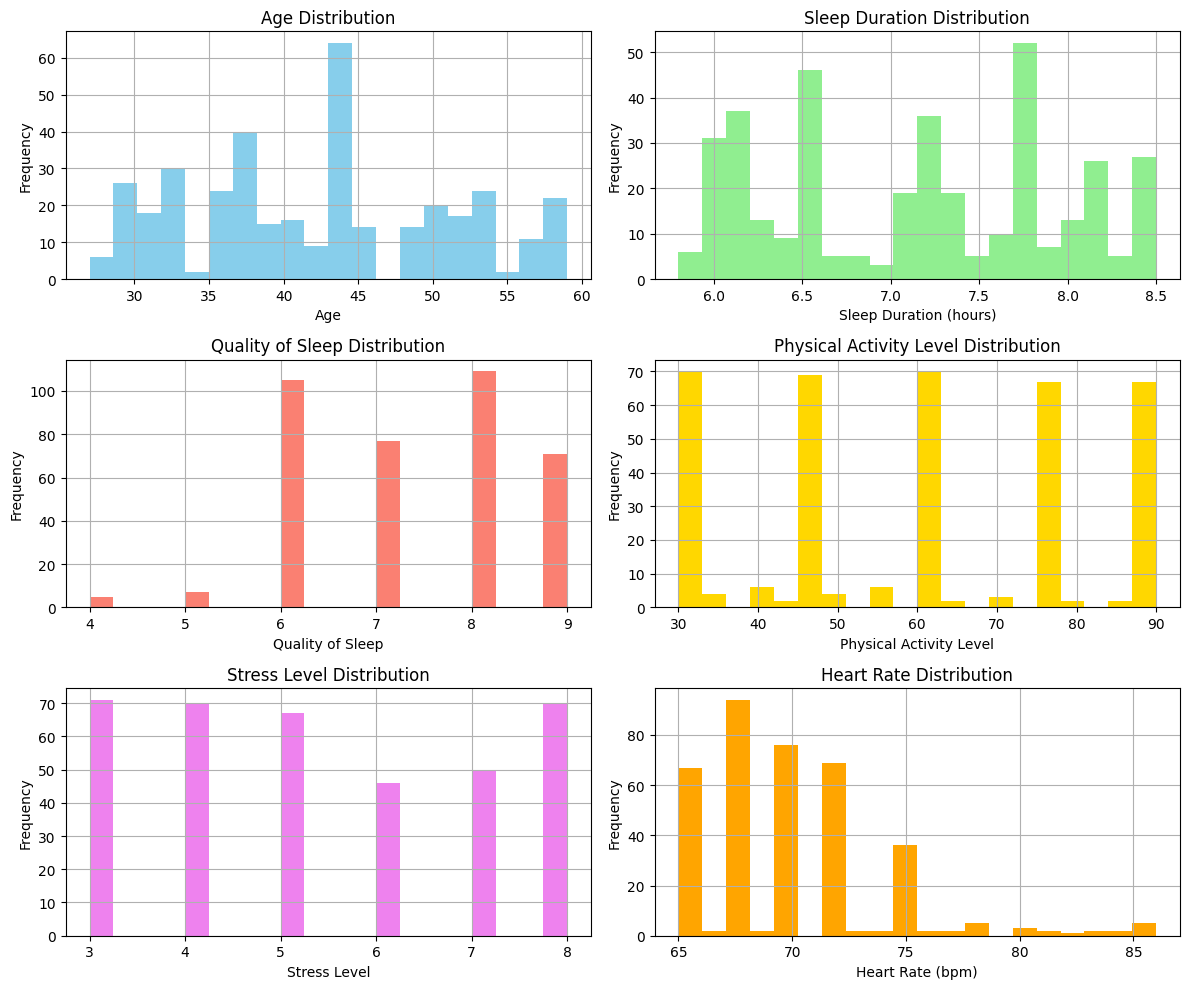

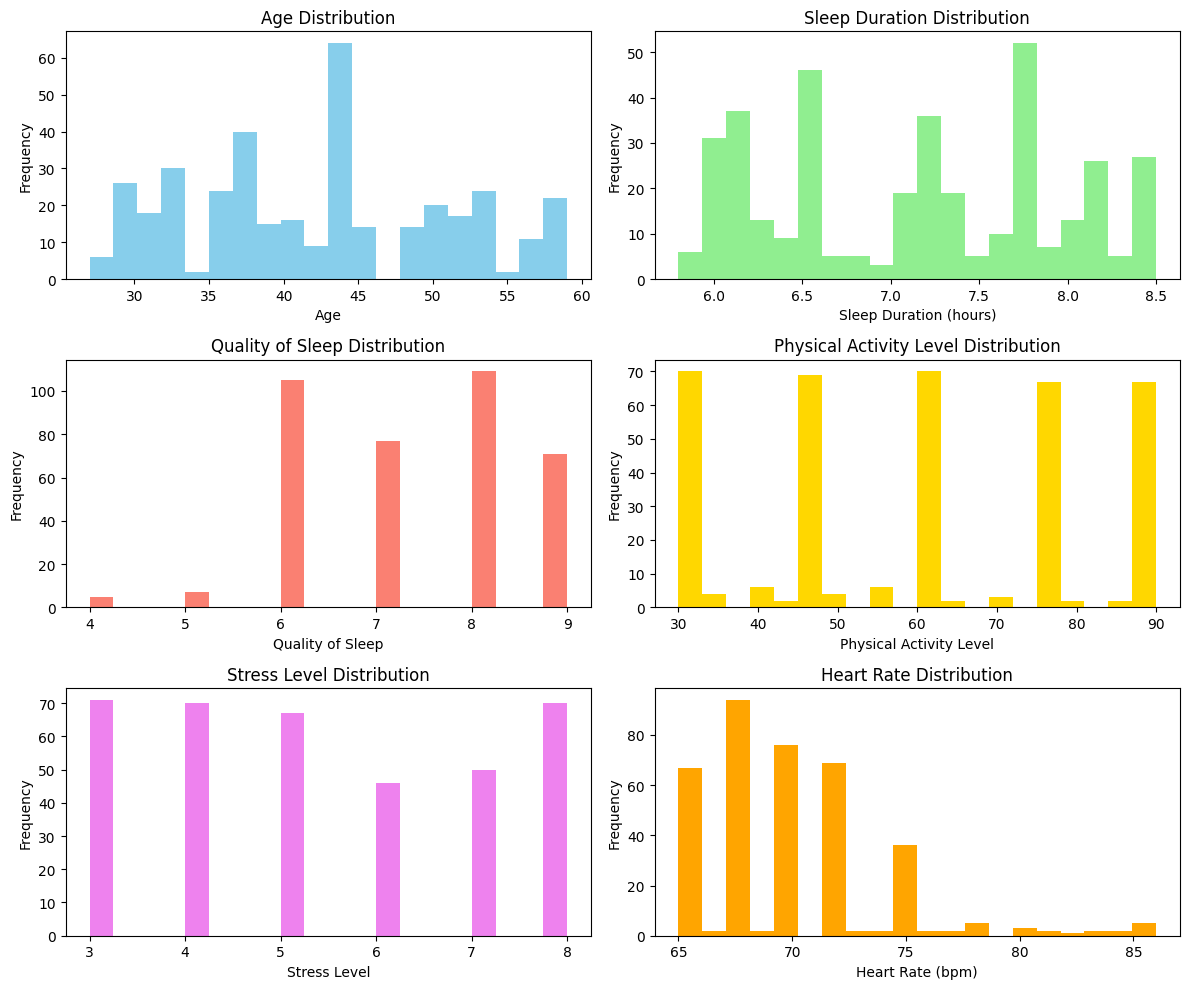

Time to use Pandas for drawing:0.7428 seconds
Time to use Numpy for drawing: 0.7125 seconds


<Figure size 1200x800 with 0 Axes>

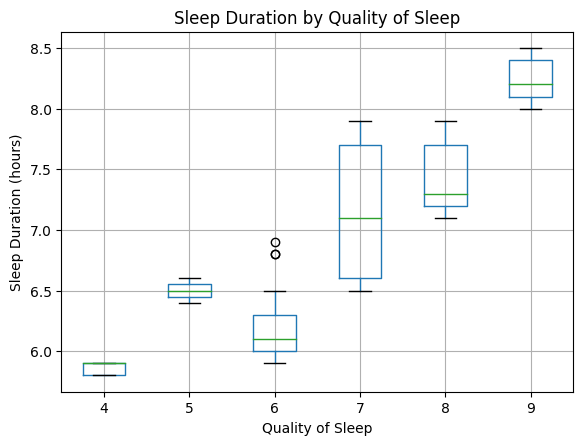

<Figure size 1200x800 with 0 Axes>

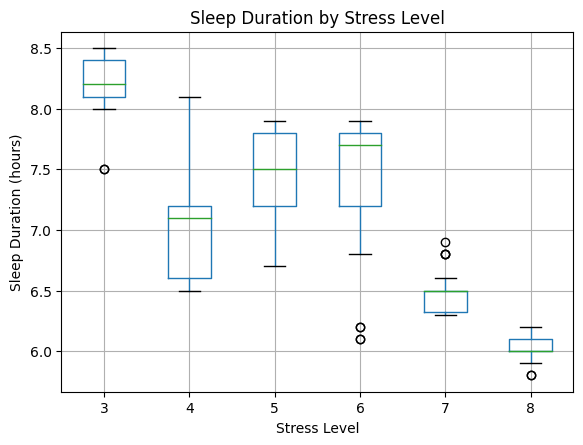

<Figure size 1200x800 with 0 Axes>

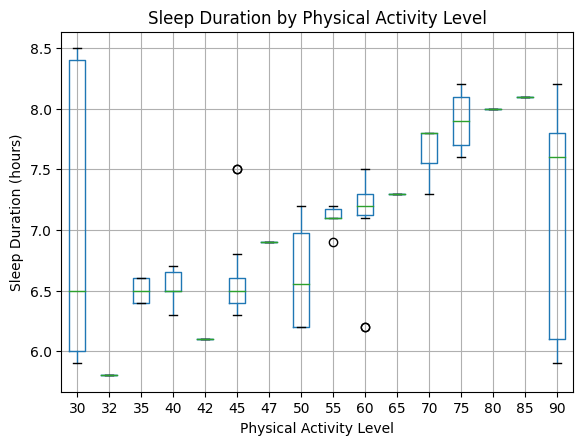

<Figure size 1200x800 with 0 Axes>

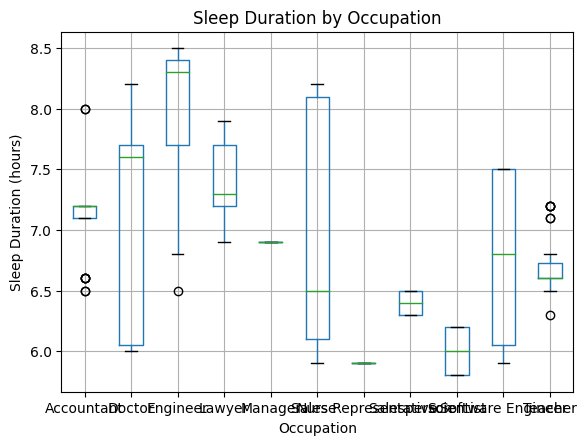

<Figure size 1200x800 with 0 Axes>

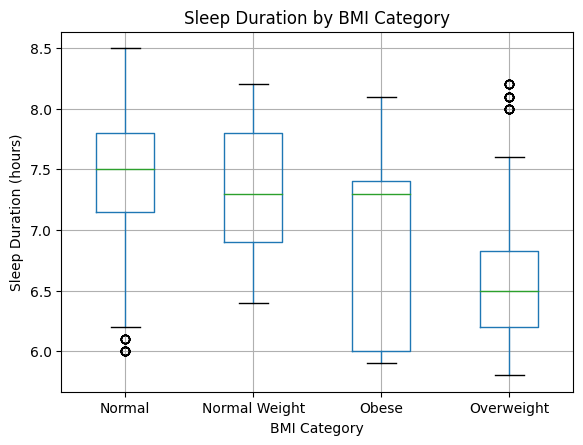

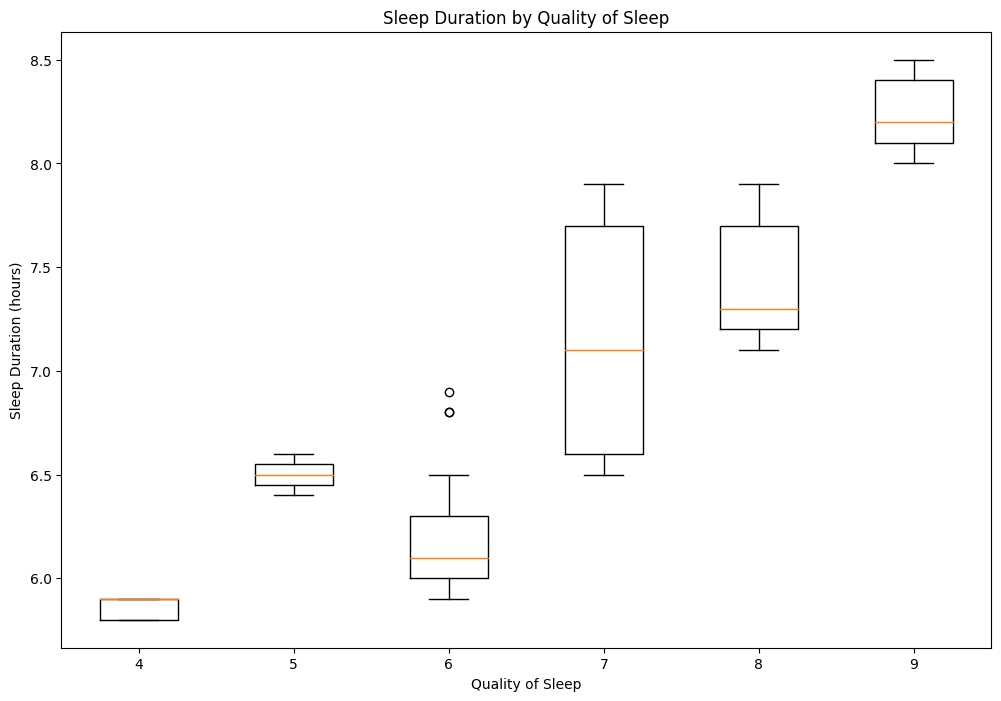

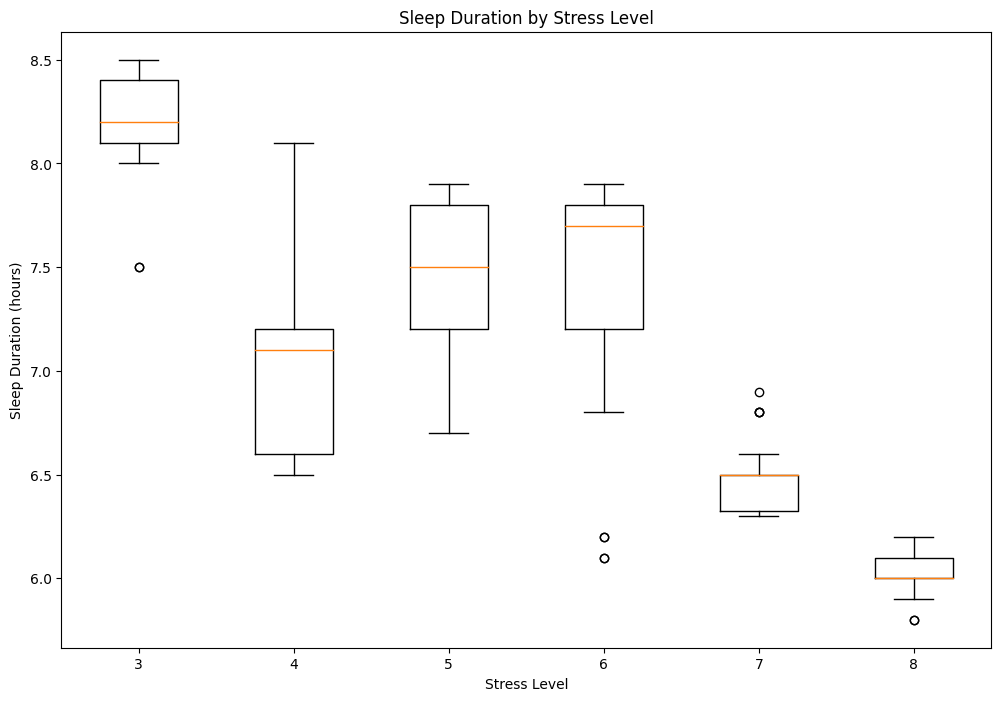

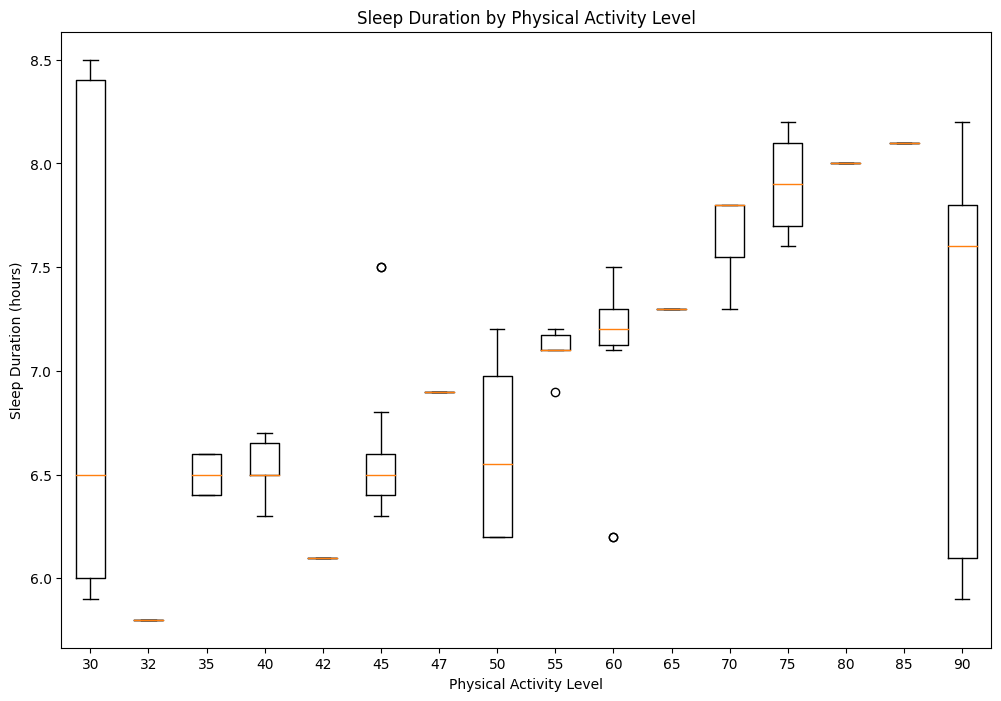

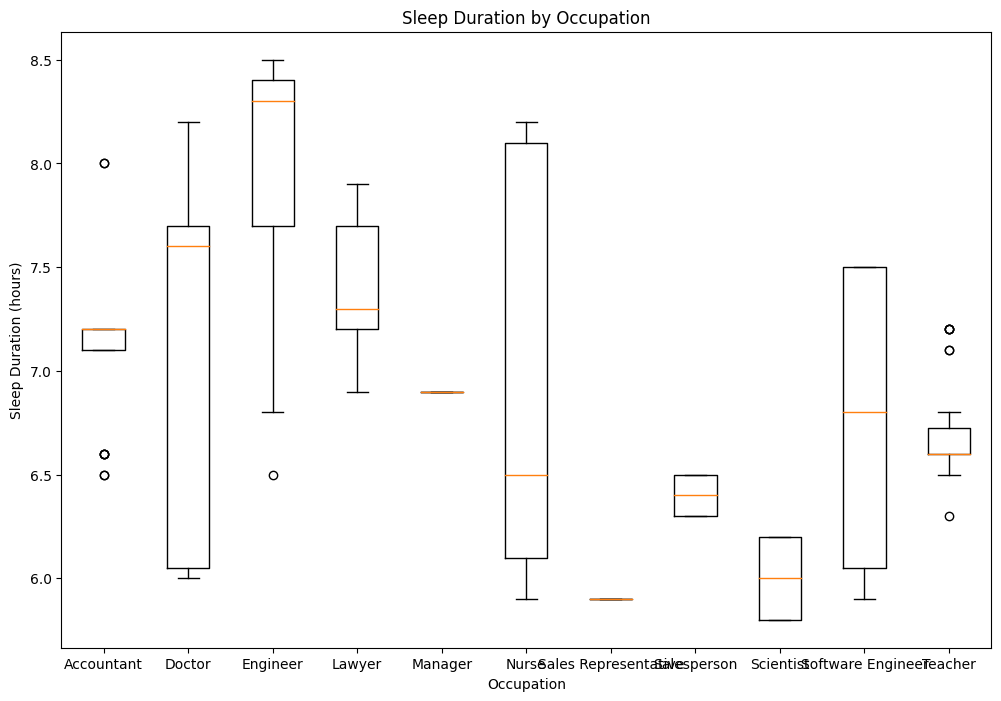

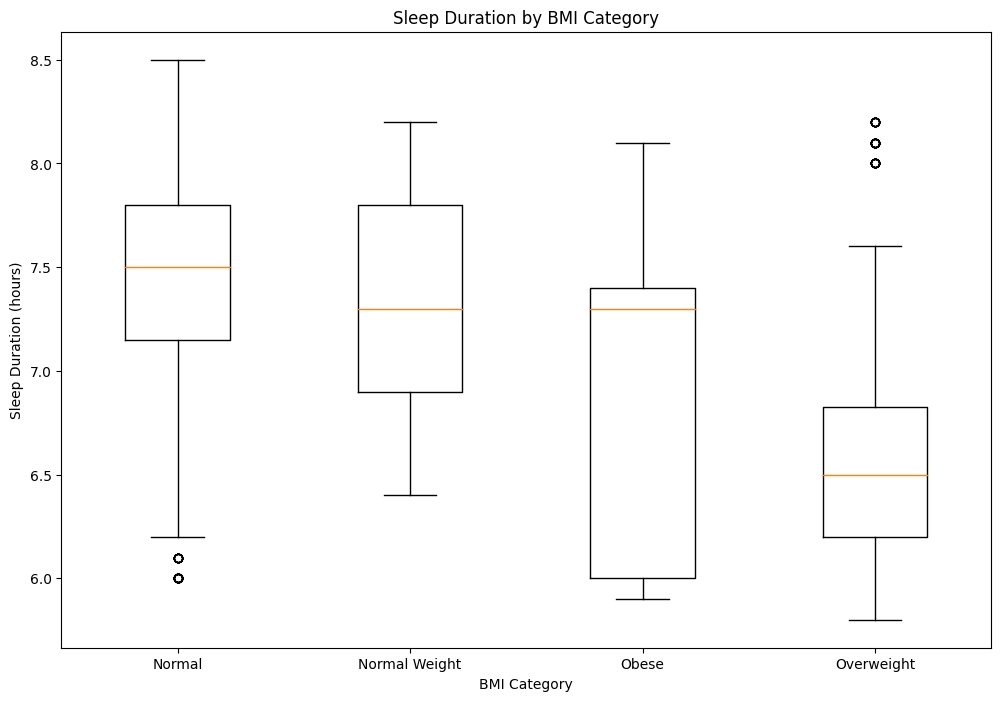

Time to use Pandas for drawing: 0.6479 seconds
Time to use Numpy for drawing: 0.7053 seconds


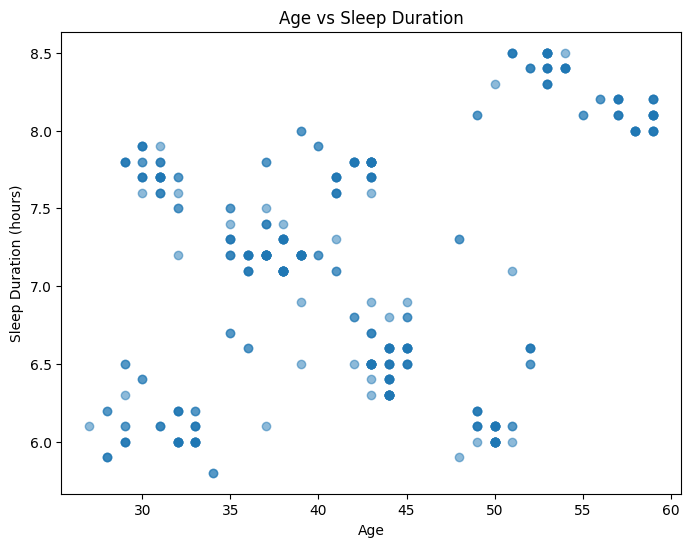

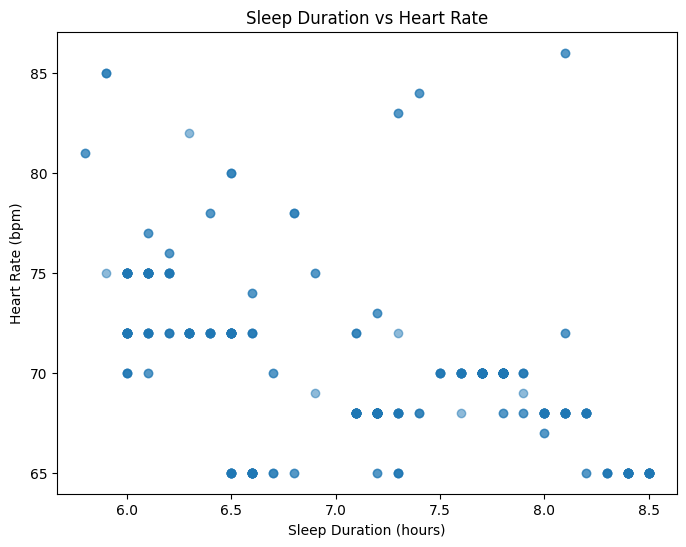

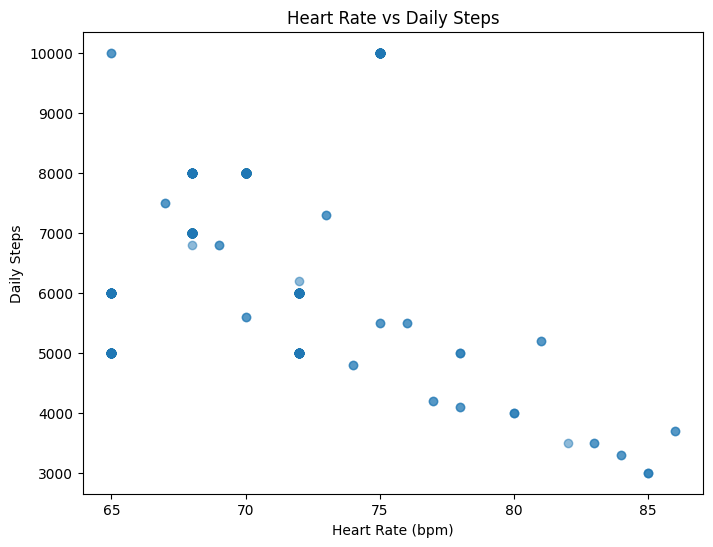

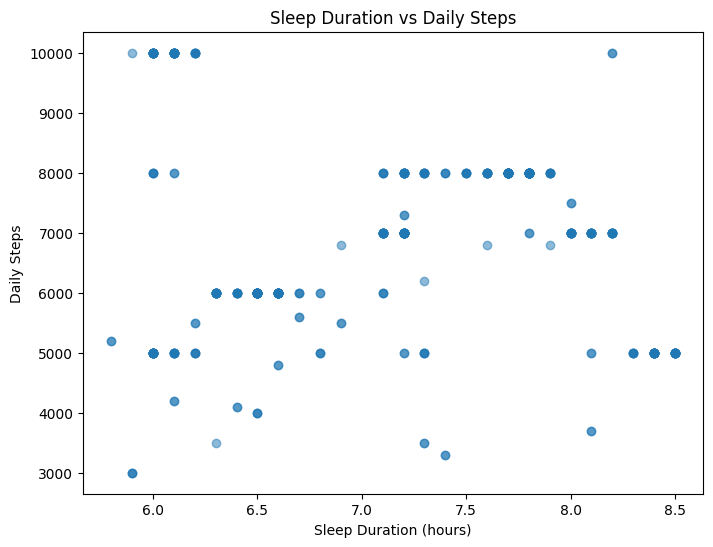

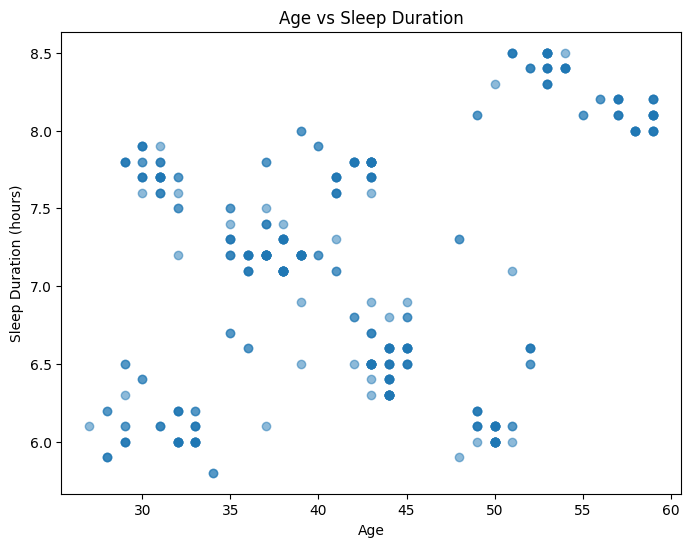

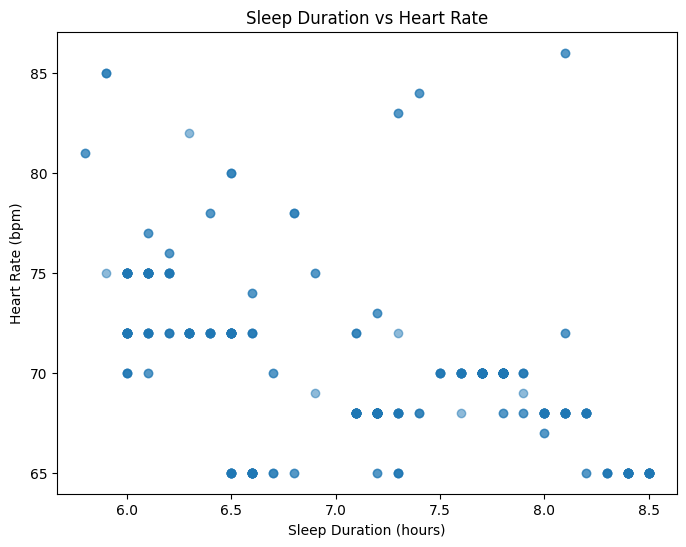

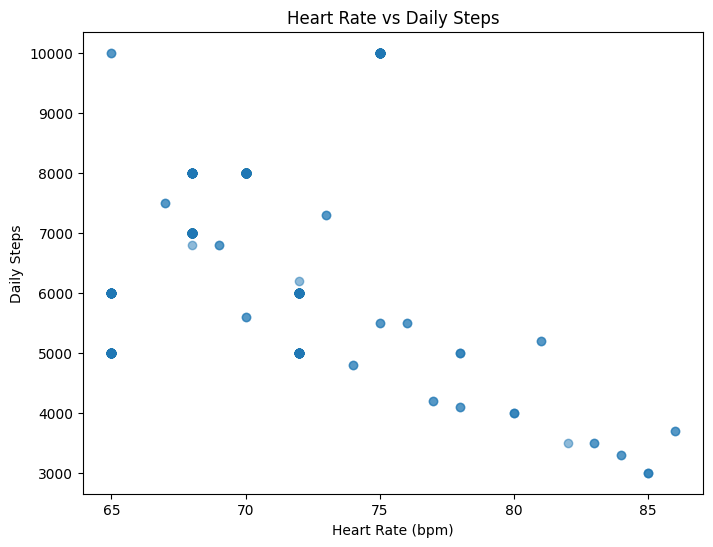

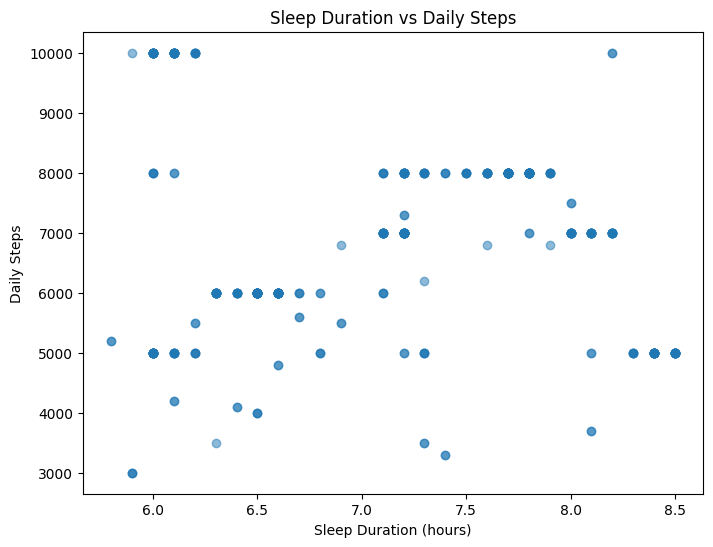

Time to use Pandas for drawing: 0.4408 seconds
Time to use Numpy for drawing: 0.4139 seconds


In [1]:
# Write your code for AIM #3 here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

df = pd.read_csv('sleep_health.csv')

start_time_pandas = time.time()
plt.figure(figsize=(12, 10))

# 1.1 
plt.subplot(3, 2, 1)
df['Age'].hist(bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 1.2
plt.subplot(3, 2, 2)
df['Sleep Duration'].hist(bins=20, color='lightgreen')
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')

# 1.3 
plt.subplot(3, 2, 3)
df['Quality of Sleep'].hist(bins=20, color='salmon')
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')

# 1.4 
plt.subplot(3, 2, 4)
df['Physical Activity Level'].hist(bins=20, color='gold')
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')

# 1.5 
plt.subplot(3, 2, 5)
df['Stress Level'].hist(bins=20, color='violet')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')

# 1.6
plt.subplot(3, 2, 6)
df['Heart Rate'].hist(bins=20, color='orange')
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

age = df['Age'].to_numpy()
sleep_duration = df['Sleep Duration'].to_numpy()
quality_of_sleep = df['Quality of Sleep'].to_numpy()
physical_activity_level = df['Physical Activity Level'].to_numpy()
stress_level = df['Stress Level'].to_numpy()
heart_rate = df['Heart Rate'].to_numpy()

start_time_numpy = time.time()

plt.figure(figsize=(12, 10))

# 2.1 
plt.subplot(3, 2, 1)
plt.hist(age, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2.2 
plt.subplot(3, 2, 2)
plt.hist(sleep_duration, bins=20, color='lightgreen')
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')

# 2.3 
plt.subplot(3, 2, 3)
plt.hist(quality_of_sleep, bins=20, color='salmon')
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')

# 2.4 
plt.subplot(3, 2, 4)
plt.hist(physical_activity_level, bins=20, color='gold')
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')

# 2.5
plt.subplot(3, 2, 5)
plt.hist(stress_level, bins=20, color='violet')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')

# 2.6 
plt.subplot(3, 2, 6)
plt.hist(heart_rate, bins=20, color='orange')
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

print(f'Time to use Pandas for drawing:{pandas_time:.4f} seconds')
print(f'Time to use Numpy for drawing: {numpy_time:.4f} seconds')

start_time_pandas = time.time()
# 3.1
plt.figure(figsize=(12, 8))
df.boxplot(column='Sleep Duration', by='Quality of Sleep')
plt.title('Sleep Duration by Quality of Sleep')
plt.suptitle('')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.2
plt.figure(figsize=(12, 8))
df.boxplot(column='Sleep Duration', by='Stress Level')
plt.title('Sleep Duration by Stress Level')
plt.suptitle('')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.3
plt.figure(figsize=(12, 8))
df.boxplot(column='Sleep Duration', by='Physical Activity Level')
plt.title('Sleep Duration by Physical Activity Level')
plt.suptitle('')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.4
plt.figure(figsize=(12, 8))
df.boxplot(column='Sleep Duration', by='Occupation')
plt.title('Sleep Duration by Occupation')
plt.suptitle('')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.5
plt.figure(figsize=(12, 8))
df.boxplot(column='Sleep Duration', by='BMI Category')
plt.title('Sleep Duration by BMI Category')
plt.suptitle('')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()

end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

start_time_numpy = time.time()
# 4.1
unique_quality = np.unique(quality_of_sleep)
variable1_list_quality = [sleep_duration[quality_of_sleep == i] for i in unique_quality]

plt.figure(figsize=(12, 8))
plt.boxplot(variable1_list_quality, labels=unique_quality)
plt.title('Sleep Duration by Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4.2 
unique_stress = np.unique(stress_level)
variable1_list_stress = [sleep_duration[stress_level == i] for i in unique_stress]

plt.figure(figsize=(12, 8))
plt.boxplot(variable1_list_stress, labels=unique_stress)
plt.title('Sleep Duration by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4.3 
unique_activity = np.unique(physical_activity_level)
variable1_list_activity = [sleep_duration[physical_activity_level == i] for i in unique_activity]

plt.figure(figsize=(12, 8))
plt.boxplot(variable1_list_activity, labels=unique_activity)
plt.title('Sleep Duration by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4.4 
unique_occupation = np.unique(df['Occupation'])
variable1_list_occupation = [sleep_duration[df['Occupation'] == i] for i in unique_occupation]

plt.figure(figsize=(12, 8))
plt.boxplot(variable1_list_occupation, labels=unique_occupation)
plt.title('Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4.5 
unique_bmi = np.unique(df['BMI Category'])
variable1_list_bmi = [sleep_duration[df['BMI Category'] == i] for i in unique_bmi]

plt.figure(figsize=(12, 8))
plt.boxplot(variable1_list_bmi, labels=unique_bmi)
plt.title('Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()

end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

print(f'Time to use Pandas for drawing: {pandas_time:.4f} seconds')
print(f'Time to use Numpy for drawing: {numpy_time:.4f} seconds')

start_time_pandas = time.time()

# 5.1 
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Sleep Duration'], alpha=0.5)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 5.2
plt.figure(figsize=(8, 6))
plt.scatter(df['Sleep Duration'], df['Heart Rate'], alpha=0.5)
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

# 5.3
plt.figure(figsize=(8, 6))
plt.scatter(df['Heart Rate'], df['Daily Steps'], alpha=0.5)
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()

# 5.4
plt.figure(figsize=(8, 6))
plt.scatter(df['Sleep Duration'], df['Daily Steps'], alpha=0.5)
plt.title('Sleep Duration vs Daily Steps')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Daily Steps')
plt.show()
end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

start_time_numpy = time.time()
# 6.1
plt.figure(figsize=(8, 6))
plt.scatter(age, sleep_duration, alpha=0.5)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 6.2 
plt.figure(figsize=(8, 6))
plt.scatter(sleep_duration, heart_rate, alpha=0.5)
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

# 6.3 
plt.figure(figsize=(8, 6))
plt.scatter(heart_rate, df['Daily Steps'].to_numpy(), alpha=0.5)
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()

# 6.4 
plt.figure(figsize=(8, 6))
plt.scatter(sleep_duration, df['Daily Steps'].to_numpy(), alpha=0.5)
plt.title('Sleep Duration vs Daily Steps')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Daily Steps')
plt.show()

end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy



print(f'Time to use Pandas for drawing: {pandas_time:.4f} seconds')
print(f'Time to use Numpy for drawing: {numpy_time:.4f} seconds')


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



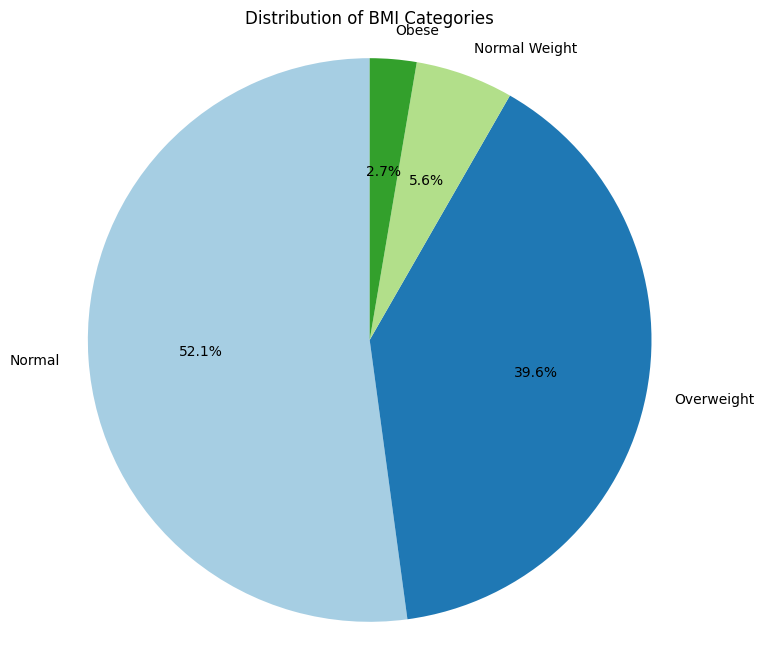

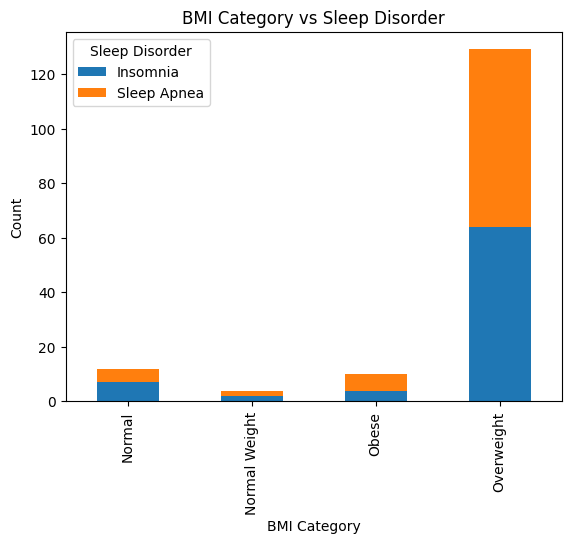

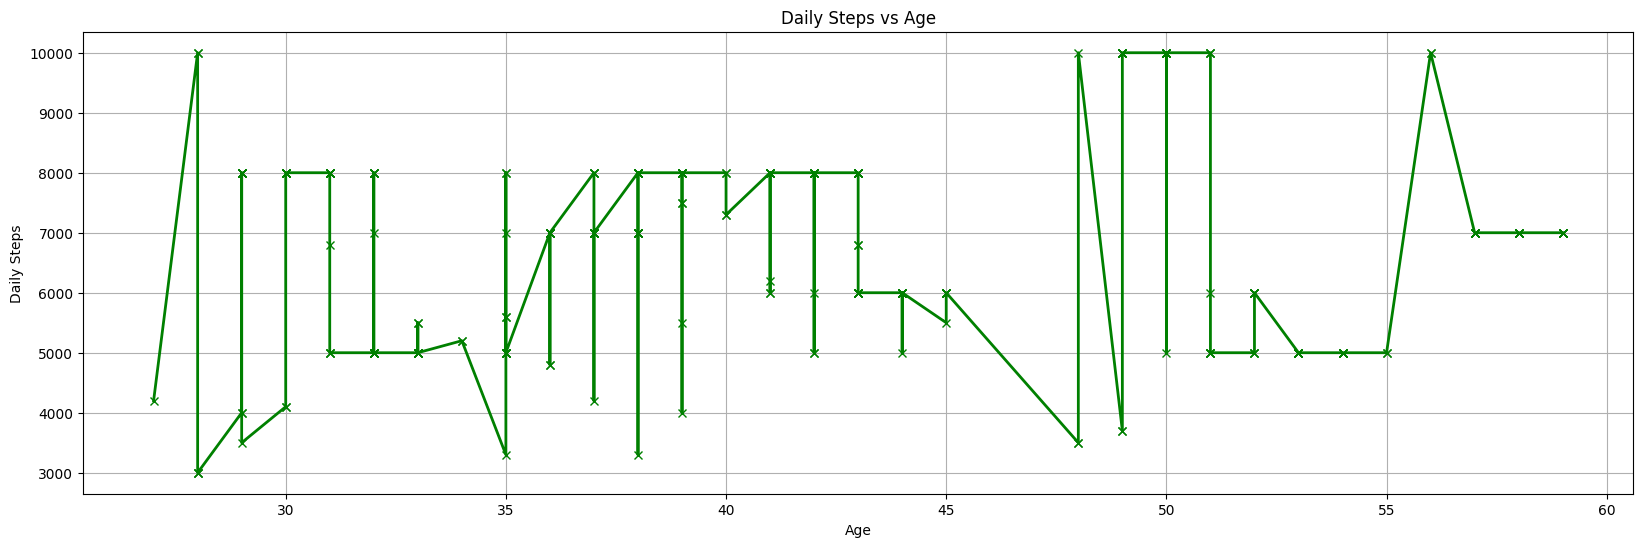

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('sleep_health.csv')

#BMI classification and distribution among different populations
bmi_counts = df['BMI Category'].value_counts()

# Draw a pie chart
plt.figure(figsize=(8, 8))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of BMI Categories')
plt.axis('equal') 
plt.show()

# Calculate the percentage of sleep disorders for each BMI category
bmi_sleep_disorder = pd.crosstab(df['BMI Category'], df['Sleep Disorder'])
bmi_sleep_disorder.plot(kind='bar', stacked=True)
plt.title('BMI Category vs Sleep Disorder')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()


age = df['Age'].values
daily_steps = df['Daily Steps'].values

# The trend of "Daily Steps" changing with "Age"
sorted_indices = np.argsort(age)
sorted_age = age[sorted_indices]
sorted_daily_steps = daily_steps[sorted_indices]

# Draw a line chart
plt.figure(figsize=(20, 6))
plt.plot(sorted_age, sorted_daily_steps, color='g', marker='x', linestyle='-', linewidth=2, markersize=6)

plt.title('Daily Steps vs Age')
plt.xlabel('Age')
plt.ylabel('Daily Steps')
plt.grid(True)
plt.show()